In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [3]:
# Path ke model yang disimpan dalam format .h5
model_path = "./models/v3_last.h5"

# Memuat model
model = load_model(model_path)

# Path ke direktori dataset
test_dir = "./dataset/test_set_rgb"

# Membuat objek ImageDataGenerator untuk data uji
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Pastikan shuffle dinonaktifkan untuk menjaga urutan data
)

# Evaluasi model pada data uji
loss, accuracy, precision, recall = model.evaluate(test_generator)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Menghitung prediksi untuk data uji
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mendapatkan label sebenarnya dari test_generator
y_true = test_generator.classes

# Mendapatkan label class dari test_generator
class_labels = list(test_generator.class_indices.keys())

# Menghitung F1-score dan metrik lainnya
accuracy_sklearn = accuracy_score(y_true, y_pred)
precision_sklearn = precision_score(y_true, y_pred, average='weighted')
recall_sklearn = recall_score(y_true, y_pred, average='weighted')
f1_sklearn = f1_score(y_true, y_pred, average='weighted')

print("\nMetrics using sklearn:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")
print(f"F1 Score: {f1_sklearn}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 60 images belonging to 3 classes.


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9667 - loss: 0.0846 - precision: 0.9667 - recall: 0.9667
Loss: 0.08464466780424118
Accuracy: 0.9666666388511658
Precision: 0.9666666388511658
Recall: 0.9666666388511658
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step

Metrics using sklearn:
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613

Classification Report:
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00        20
      Pisang       1.00      0.90      0.95        20
    Rambutan       0.91      1.00      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix:
[[20  0  0]
 [ 0 18  2]
 [ 0  0 20]]


Found 60 images belonging to 3 classes.


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667


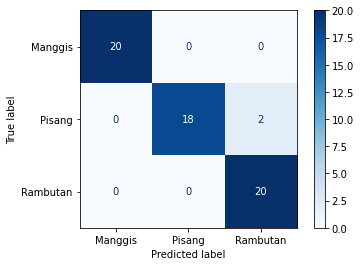

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score


model = tf.keras.models.load_model("./models/v3.keras")
datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',  # Assuming sparse labels
    shuffle=False
)

# Get the true labels from the generator
true_labels = validation_generator.classes

# Predict the classes for the validation data
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='macro')  # Use 'micro' or 'weighted' as needed
recall = recall_score(true_labels, predicted_classes, average='macro')  # Use 'micro' or 'weighted' as needed

# Print accuracy, precision, and recall
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predictions for ./dataset/rgb_masking/train/Manggis/masking_Manggis_332.jpg: Manggis

Confidence result: 
Manggis 	:   0.99976295
Pisang 	:   0.00023708605
Rambutan 	:   1.4166358e-08


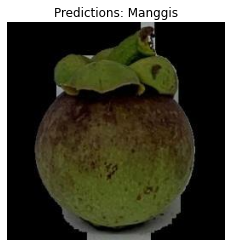

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predictions for ./dataset/rgb_masking/train/Pisang/masking_Pisang_332.jpg: Pisang

Confidence result: 
Manggis 	:   1.24411965e-08
Pisang 	:   0.9994898
Rambutan 	:   0.00051013095


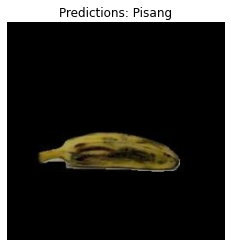

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predictions for ./dataset/rgb_masking/train/Rambutan/masking_Rambutan_332.jpg: Rambutan

Confidence result: 
Manggis 	:   3.1367963e-05
Pisang 	:   0.04737866
Rambutan 	:   0.9525899


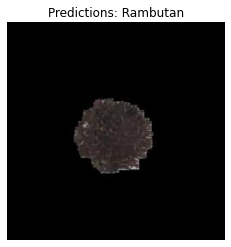

In [5]:
# Load the saved model
model = tf.keras.models.load_model('./models/v3.keras')

def preprocess_image(img_path):
    # Convert image to RGB format and save as JPEG if needed
    img = Image.open(img_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img.save(img_path.replace('.png', '.jpg'), 'JPEG')

    # Load and resize the image
    img = image.load_img(img_path.replace('.png', '.jpg'), target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# List of image paths
img_paths = [
    './dataset/rgb_masking/train/Manggis/masking_Manggis_332.jpg',        # Manggis
    './dataset/rgb_masking/train/Pisang/masking_Pisang_332.jpg',        # Pisang
    './dataset/rgb_masking/train/Rambutan/masking_Rambutan_332.jpg'         # Rambutan
]

# Labels for the classes
labels = ['Manggis', 'Pisang', 'Rambutan']

# Process and predict each image
for img_path in img_paths:
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    print(f"Predictions for {img_path}: {labels[predicted_index]}")
    
    # Print confidence results for each class
    print("\nConfidence result: ")
    for i, j in enumerate(predictions[0]):
        print(labels[i], "\t:  ", j)
    
    # Display the image with the prediction title
    plt.imshow(image.load_img(img_path.replace('.png', '.jpg')))
    plt.title(f'Predictions: {labels[predicted_index]}')
    plt.axis('off')
    plt.show()

